In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Hitters.csv")
df.dropna(inplace=True)

In [5]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
!pip install xgboost

In [15]:
import xgboost

In [16]:
from xgboost import XGBRegressor

In [17]:
xgb = XGBRegressor().fit(X_train, y_train)

In [18]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [19]:
y_pred = xgb.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

366.3863437634965

**Model Tuning**

In [22]:
xgb_params = {'learning_rate': [0.1,0.01],
              'max_depth': [2,3,4,5],
              'n_estimators': [100,200,500],
              'colsample_bytree': [0.4,0.7,1]
              }

In [25]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [26]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 500}

**Final Model**

In [31]:
xgb_tuned = XGBRegressor(colsample_bytree=0.4, learning_rate=0.01, max_depth=5, n_estimators=500).fit(X_train, y_train)

In [32]:
y_pred = xgb_tuned.predict(X_test)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

350.45901705656803

**Hyperparameter significance level**

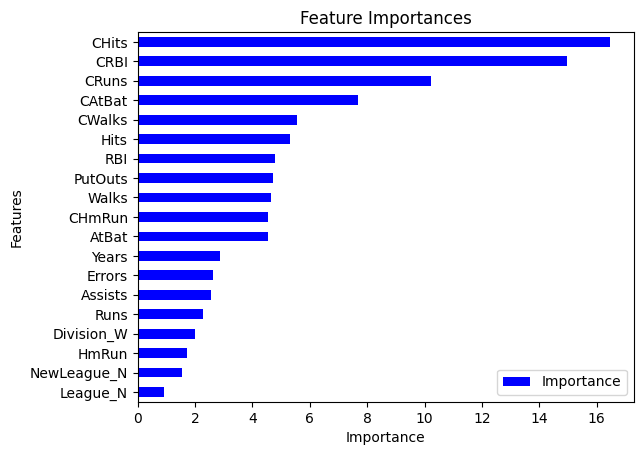

In [34]:
importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100,
                          "index": X_train.columns})

importance.sort_values(by="Importance",
                       axis = 0, # by rows
                       ascending=True).plot(x="index", y="Importance", kind="barh", color = "b")

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()
